`63070501061 S.RAKNA`

# 2. Regression on diabetes

> 5 points. 
> 1 hr.

#### 2.1 Is `age` highly correlated with `total cholesterol / HDL` (column `S4`)?

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

In [2]:
diabetes = datasets.load_diabetes(return_X_y=False, as_frame=False)

diabetes_X = diabetes['data']
diabetes_y = diabetes['target']
print("Data description: \n", diabetes['DESCR'])


Data description: 
 .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

N

Correlation between age and total cholesterol / HDL:  0.20384089972875552


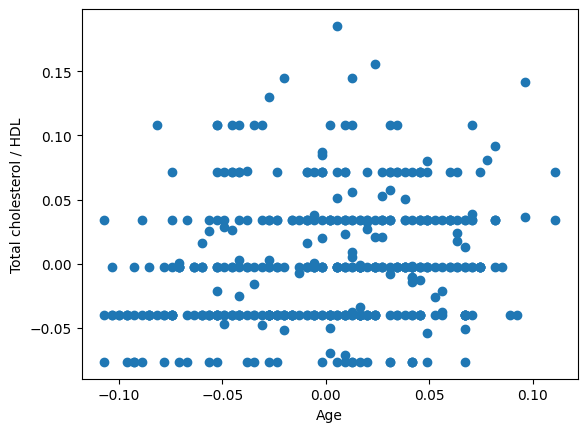

In [3]:
# Correlation between features age (column 0) and s4 (column 7)
print("Correlation between age and total cholesterol / HDL: ", np.corrcoef(
    diabetes_X[:, 0], # age
    diabetes_X[:, 7]) # s4 or tch, total cholesterol / HDL
    [0, 1]
)
# Scatter plot
plt.scatter(diabetes_X[:, 0], diabetes_X[:, 7])
plt.xlabel("Age")
plt.ylabel("Total cholesterol / HDL")
plt.show()

> 5 points. 
> 0.5 hr.

#### 2.2 Is `blood pressure` highly correlated with `total cholesterol / HDL` (column `S4`)?

Correlation between average blood pressure and total cholesterol / HDL:  0.25765005328351526


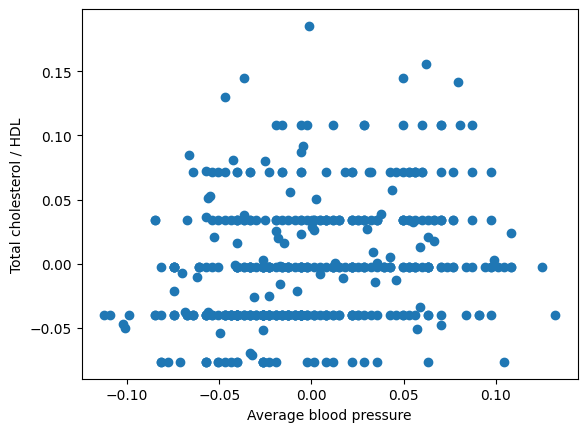

In [4]:
# Correlation between features average blood pressure (column 3) and s4 (column 7)
print("Correlation between average blood pressure and total cholesterol / HDL: ", np.corrcoef(
    diabetes_X[:, 3],  # abp
    diabetes_X[:, 7])  # s4 or tch, total cholesterol / HDL
    [0, 1]
)
# Scatter plot
plt.scatter(diabetes_X[:, 3], diabetes_X[:, 7])
plt.xlabel("Average blood pressure")
plt.ylabel("Total cholesterol / HDL")
plt.show()

> 15 points (4+3+3+5). 
> 1 hr.
#### 2.3 Report **Linear fit** results for $y = ax + b$ where $x$ is the `blood sugar level`

##### i. Linear fit coefficients and intercept of the training data

In [5]:
x = diabetes_X[:, 9] # glu, blood sugar level

In [6]:
# Split the data into training/testing sets
diabetes_X_train = x[:-20].reshape(-1, 1)
diabetes_X_test = x[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [7]:
regr = linear_model.LinearRegression()

In [8]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [9]:
print(f"Linear fit coefficients: {regr.coef_}")
print(f"Linear fit intercept: {regr.intercept_}")

Linear fit coefficients: [630.53662695]
Linear fit intercept: 153.65837014587217


##### ii. What is the $R^2$ for the training data?

In [10]:
print("R^2 for the training data: ", regr.score(diabetes_X_train, diabetes_y_train))

R^2 for the training data:  0.15013340519940488


##### iii. What is the $R^2$ for the prediction of $y$ based on `blood sugar level` for the test data?

In [11]:
diabetes_y_fitted = regr.predict(diabetes_X_train)

In [12]:
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_train, diabetes_y_fitted))

Coefficient of determination: 0.15


##### iv. Show a scatter plot of the train set $(x, y)$ as blue circles and predicted $(x, y)$ as green circles. Also show the best fit line in red.

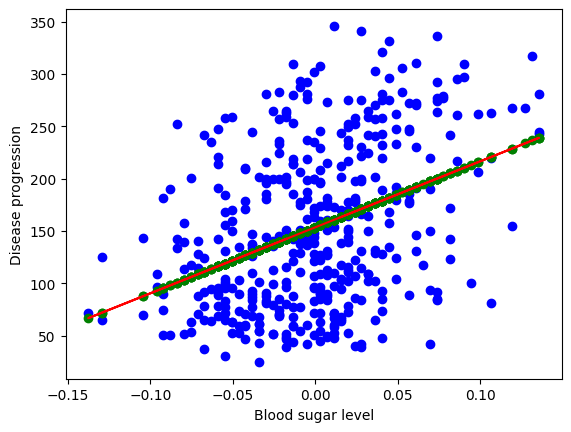

In [13]:
'''
- Scatter plot of the training set (x, y) as blue circles
- Scatter plot of the predicted (x, y) as green circles
- Best fit in red
'''
plt.scatter(diabetes_X_train, diabetes_y_train, color='blue')
plt.scatter(diabetes_X_train, diabetes_y_fitted, color='green')
plt.plot(diabetes_X_train, regr.coef_ * diabetes_X_train + regr.intercept_, color='red')
plt.xlabel('Blood sugar level')
plt.ylabel('Disease progression')
plt.show()